In [21]:
import pickle

with open('labels.pickle', 'rb') as handle:
    dictionary_labels = pickle.load(handle)

(1960, 4102, 3)
468 266 506 506
1168 926
(1960, 4102, 3)
(660, 700, 3)
(1, 48, 48, 1)
1/1 [==============================] - 0s 242ms/step
Emotion Detected : happiness


(-0.5, 4101.5, 1959.5, -0.5)

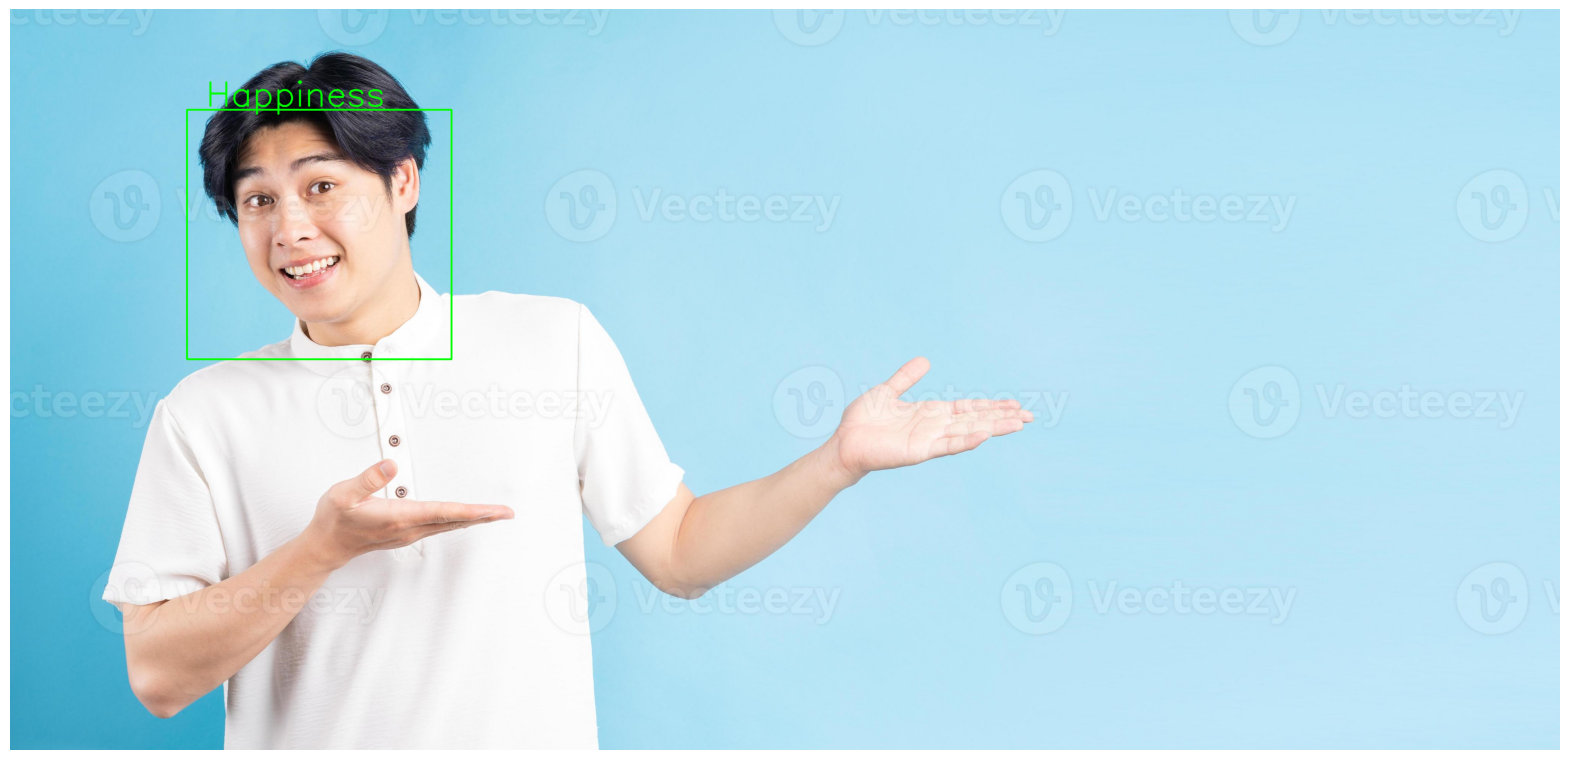

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

imagePath = 'static/images/test2.jpg'
img = cv2.imread(imagePath)
print(img.shape)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = gray_image.copy()

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

coord_x, coord_y = 0, 0

for (x, y, w, h) in face:
    coord_x, coord_y = x, y
    x, y = x-50, y-50
    w, h = w + 50, h + 50
    x_2, y_2 = int((x + w)*1.2), int((y + h)*1.2)
    cv2.rectangle(img, (x, y), (x_2, y_2), (0, 255, 0), 4)
    print(x,y,w,h)
    print(x_2,y_2)
    break

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)

cropped_image = img_rgb2[y:y_2,x:x_2]
print(cropped_image.shape)


model = load_model('model.h5', compile=False)


image_x = cv2.resize(cropped_image, (48,48), interpolation = cv2.INTER_AREA)
img_gray_x = cv2.cvtColor(image_x, cv2.COLOR_BGR2GRAY)
img_flatten_x = img_gray_x.flatten()
img_shaped_x = img_flatten_x.reshape(48, 48, 1).astype('float32')
img_normalized_x = img_shaped_x /255.
print(np.array([img_normalized_x]).shape)
y_perso = model.predict(np.array([img_normalized_x]))
print(f'Emotion Detected : {dictionary_labels[np.argmax(y_perso, axis=1).tolist()[0]]}')


# text 
text = dictionary_labels[np.argmax(y_perso, axis=1).tolist()[0]].capitalize()
  
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
  
# org 
org = (coord_x, coord_y-60) 
  
# fontScale 
fontScale = 3
   
# Red color in BGR 
color = (0, 255, 0) 
  
# Line thickness of 2 px 
thickness = 4
   
# Using cv2.putText() method 
cv2.putText(img_rgb, text, org, font, fontScale,  
                 color, thickness, cv2.LINE_AA, False) 


plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')



In [37]:
import pickle

with open('labels.pickle', 'rb') as handle:
    labels = pickle.load(handle)

labels


{0: 'anger', 1: 'fear', 2: 'happiness', 3: 'sadness', 4: 'neutral'}